### Data preparation and Exploration

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df  = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [12]:
### Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")
df.set_index('date', inplace=True)

df.head()


df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


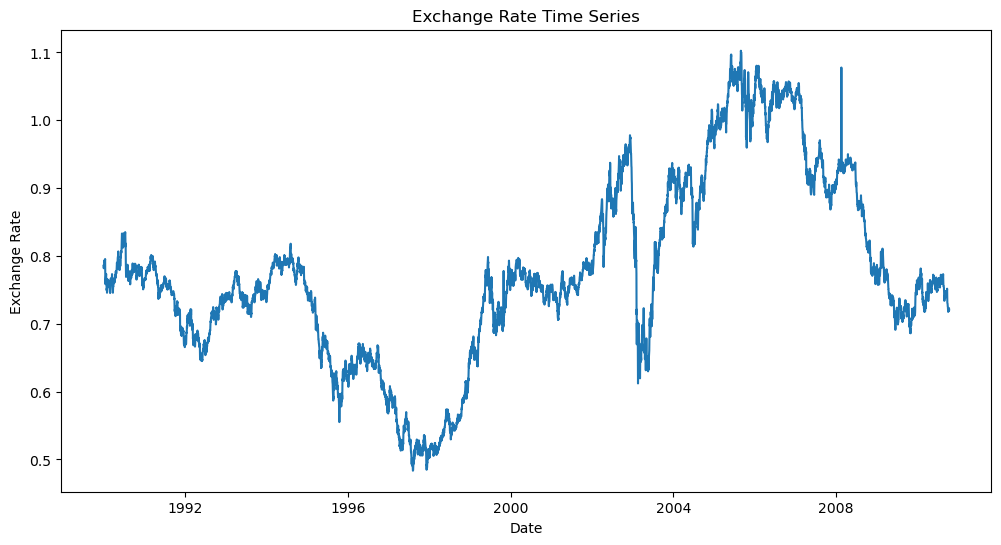

In [14]:
###Initial Exploration
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'])
plt.title("Exchange Rate Time Series")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.show()



In [15]:
### Stationarity check
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['Ex_rate'])
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])


ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974


In [16]:
###p-value > 0.05 → non-stationary

In [17]:
###Differencing
df['Ex_rate_diff'] = df['Ex_rate'].diff()
df.dropna(inplace=True)

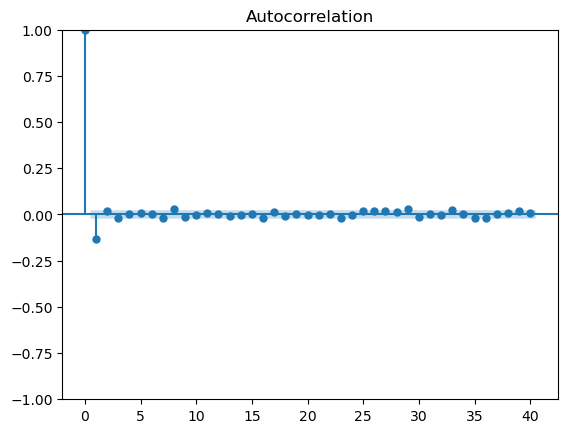

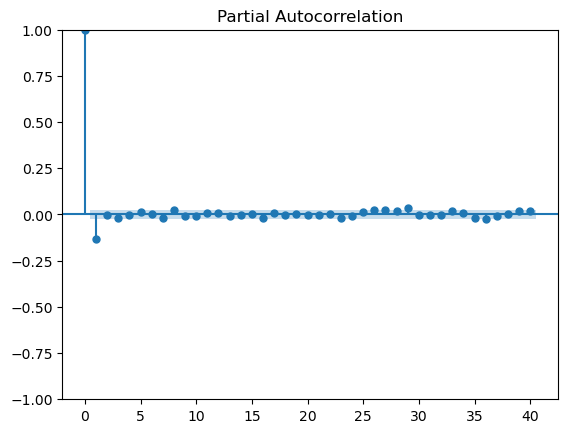

In [18]:
###ACF & PACF 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate_diff'], lags=40)
plot_pacf(df['Ex_rate_diff'], lags=40)
plt.show()


### ARIMA

In [19]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df) * 0.8)
train = df['Ex_rate'][:train_size]
test = df['Ex_rate'][train_size:]

model = ARIMA(train, order=(1,1,1))
fit = model.fit()

forecast = fit.forecast(len(test))

C:\Users\AKSHAT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AKSHAT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AKSHAT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
### xponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(train, trend='add')
hw_fit = hw.fit()
hw_forecast = hw_fit.forecast(len(test))


C:\Users\AKSHAT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
### Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

def eval(actual, pred):
    return(
        mean_absolute_error(actual,pred),
        np.sqrt(mean_squared_error(actual,pred))
    )
print("ARIMA:", eval(test, forecast))
print("HW:", eval(test, hw_forecast))

ARIMA: (0.17770982702973206, np.float64(0.20543683411337407))
HW: (0.20692890338353023, np.float64(0.23949202562494679))
